In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class TrajectoryDataset(Dataset):
    def __init__(self, dataframe, window_length=100):
        sliced_df = self.custom_transformation(dataframe.to_numpy(), window_length=window_length)
        self.data = torch.tensor(sliced_df, dtype=torch.float32)

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return self.data[idx]

    def custom_transformation(self, dataframe_array, window_length):
        num_rows, num_cols = dataframe_array.shape
        window_length += 1

        sliced_data = np.lib.stride_tricks.sliding_window_view(dataframe_array, window_shape=(window_length,), axis=1)

        sliced_data = sliced_data.reshape(-1, window_length)

        return sliced_data

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [ ]:
import os

train_path = os.path.join('/content/drive/MyDrive/sml/train.csv')
val_path = os.path.join('/content/drive/MyDrive/sml/val.csv')
test_path = os.path.join('/content/drive/MyDrive/sml/test.csv')

train_df = pd.read_csv(train_path, header = 0).drop('ids', axis=1)
val_df = pd.read_csv(val_path, header = 0).drop('ids', axis=1)
test_df = pd.read_csv(test_path, header = 0).drop('ids', axis=1)

In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device("cuda")

window_length = 100
dataset = TrajectoryDataset(dataframe=train_df, window_length=window_length)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_size = window_length

hidden_size1 = 64
hidden_size2 = 64
output_size = 1
learning_rate = 0.0001
num_epochs = 3

model = MLP(input_size, hidden_size1, hidden_size2, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(num_epochs), desc="Epochs", unit="epoch"):
    model.train()
    running_loss = 0.0
    for batch_idx, data in tqdm(enumerate(dataloader), desc=f"Epoch {epoch + 1}", unit="batch", leave=False):

        inputs = data[:, :-1].to(device)
        targets = data[:, -1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        outputs = torch.nan_to_num(outputs, nan=0.0)

        loss = criterion(outputs.squeeze(), targets)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(dataloader):.4f}')

Streaming output truncated to the last 5000 lines.
Epoch 1: 41202batch [01:47, 434.71batch/s]
Epoch 1: 41251batch [01:47, 450.39batch/s]
Epoch 1: 41298batch [01:47, 455.02batch/s]
Epoch 1: 41346batch [01:47, 460.39batch/s]
Epoch 1: 41396batch [01:47, 470.07batch/s]
Epoch 1: 41444batch [01:47, 449.97batch/s]
Epoch 1: 41490batch [01:48, 407.09batch/s]
Epoch 1: 41537batch [01:48, 422.88batch/s]
Epoch 1: 41584batch [01:48, 434.59batch/s]
Epoch 1: 41634batch [01:48, 451.76batch/s]
Epoch 1: 41686batch [01:48, 469.88batch/s]
Epoch 1: 41734batch [01:48, 472.74batch/s]
Epoch 1: 41784batch [01:48, 479.77batch/s]
Epoch 1: 41833batch [01:48, 467.77batch/s]
Epoch 1: 41881batch [01:48, 440.66batch/s]
Epoch 1: 41926batch [01:48, 401.28batch/s]
Epoch 1: 41967batch [01:49, 402.51batch/s]
Epoch 1: 42019batch [01:49, 432.99batch/s]
Epoch 1: 42066batch [01:49, 441.41batch/s]
Epoch 1: 42114batch [01:49, 447.45batch/s]
Epoch 1: 42164batch [01:49, 461.97batch/s]
Epoch 1: 42212batch [01:49, 466.28batch/s]
Epo

Epoch [1/3], Loss: 0.0003


Streaming output truncated to the last 5000 lines.
Epoch 2: 53727batch [02:26, 395.94batch/s]
Epoch 2: 53771batch [02:26, 408.40batch/s]
Epoch 2: 53819batch [02:26, 427.88batch/s]
Epoch 2: 53862batch [02:26, 411.75batch/s]
Epoch 2: 53907batch [02:26, 421.81batch/s]
Epoch 2: 53950batch [02:26, 390.26batch/s]
Epoch 2: 53990batch [02:26, 368.21batch/s]
Epoch 2: 54028batch [02:27, 370.12batch/s]
Epoch 2: 54070batch [02:27, 383.46batch/s]
Epoch 2: 54115batch [02:27, 399.97batch/s]
Epoch 2: 54158batch [02:27, 406.81batch/s]
Epoch 2: 54202batch [02:27, 414.43batch/s]
Epoch 2: 54247batch [02:27, 423.78batch/s]
Epoch 2: 54290batch [02:27, 401.71batch/s]
Epoch 2: 54331batch [02:27, 375.58batch/s]
Epoch 2: 54370batch [02:27, 361.39batch/s]
Epoch 2: 54408batch [02:27, 366.36batch/s]
Epoch 2: 54449batch [02:28, 377.73batch/s]
Epoch 2: 54490batch [02:28, 386.06batch/s]
Epoch 2: 54533batch [02:28, 397.03batch/s]
Epoch 2: 54579batch [02:28, 412.42batch/s]
Epoch 2: 54622batch [02:28, 417.08batch/s]
Epo

Epoch [2/3], Loss: 0.0003


Streaming output truncated to the last 5000 lines.
Epoch 3: 49386batch [02:17, 319.83batch/s]
Epoch 3: 49427batch [02:17, 342.71batch/s]
Epoch 3: 49464batch [02:17, 348.06batch/s]
Epoch 3: 49500batch [02:17, 317.43batch/s]
Epoch 3: 49533batch [02:17, 304.27batch/s]
Epoch 3: 49565batch [02:18, 302.41batch/s]
Epoch 3: 49603batch [02:18, 323.29batch/s]
Epoch 3: 49636batch [02:18, 284.57batch/s]
Epoch 3: 49666batch [02:18, 258.63batch/s]
Epoch 3: 49693batch [02:18, 254.81batch/s]
Epoch 3: 49724batch [02:18, 268.10batch/s]
Epoch 3: 49757batch [02:18, 284.57batch/s]
Epoch 3: 49791batch [02:18, 298.46batch/s]
Epoch 3: 49827batch [02:18, 309.84batch/s]
Epoch 3: 49859batch [02:19, 298.27batch/s]
Epoch 3: 49891batch [02:19, 303.95batch/s]
Epoch 3: 49922batch [02:19, 301.57batch/s]
Epoch 3: 49953batch [02:19, 299.11batch/s]
Epoch 3: 49985batch [02:19, 304.98batch/s]
Epoch 3: 50019batch [02:19, 314.06batch/s]
Epoch 3: 50055batch [02:19, 327.32batch/s]
Epoch 3: 50091batch [02:19, 336.01batch/s]
Epo

Epoch [3/3], Loss: 0.0003


In [ ]:
from torch.nn import MSELoss

train_set = torch.tensor(train_df.values[:,:].astype(np.float32), dtype=torch.float32)
val_set = torch.tensor(val_df.values[:,:].astype(np.float32), dtype=torch.float32)
test_set = torch.tensor(val_df.values[:,:].astype(np.float32), dtype=torch.float32)

points_to_predict = val_set.shape[1]

def autoregressive_predict(model, input_maxtrix, prediction_length=points_to_predict):

    model.eval()
    output_matrix = torch.empty(input_maxtrix.shape[0],0)
    current_input = input_maxtrix

    with torch.no_grad():
        for idx in range(prediction_length):
            next_pred = model(current_input)
            output_matrix = torch.cat((output_matrix, next_pred), dim=1)
            current_input = torch.cat((current_input[:, 1:],next_pred),dim=1)

    return output_matrix

initial_input = train_set[:, -window_length:]
full_trajectories = autoregressive_predict(model, initial_input)

mse_loss = MSELoss()

mse = mse_loss(full_trajectories, val_set)

print(f'Autoregressive Validation MSE (using torch): {mse.item():.4f}')

Autoregressive Validation MSE (using torch): 0.0062


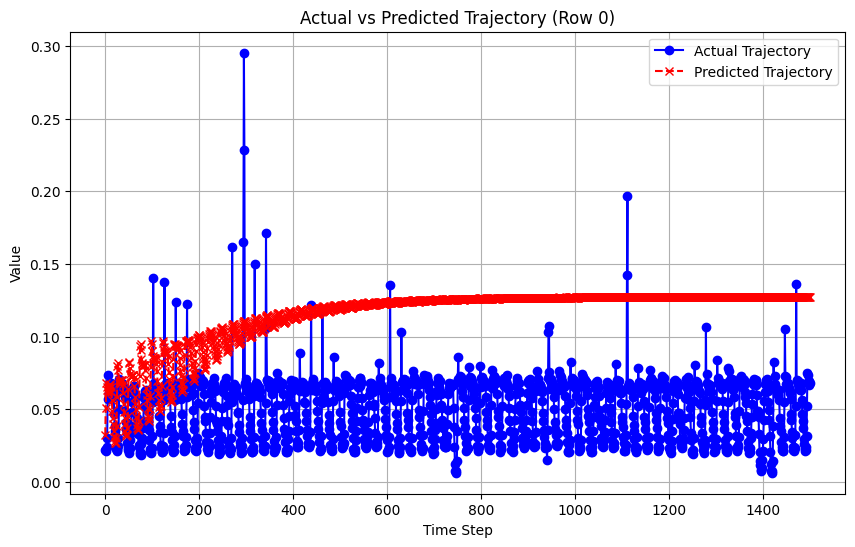

In [ ]:
row_idx = 0
initial_input = val_set[row_idx, :window_length].unsqueeze(0)

predicted_trajectory = autoregressive_predict(model, initial_input)

actual_trajectory = val_set[row_idx].numpy()

plt.figure(figsize=(10, 6))
plt.plot(range(len(actual_trajectory)), actual_trajectory, label="Actual Trajectory", color='blue', marker='o')
plt.plot(range(len(actual_trajectory)), predicted_trajectory.squeeze().numpy(), label="Predicted Trajectory", color='red', linestyle='--', marker='x')
plt.title(f"Actual vs Predicted Trajectory (Row {row_idx})")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
initial_input = train_set[:, -window_length:]
val_predictions_tensor = autoregressive_predict(model, initial_input)

initial_input = val_predictions_tensor[:, -window_length:]
test_predictions_tensor = autoregressive_predict(model, initial_input)

print(f'Validation Predictions Tensor Shape: {val_predictions_tensor.shape}')
print(f'Test Predictions Tensor Shape: {test_predictions_tensor.shape}')

Validation Predictions Tensor Shape: torch.Size([963, 1500])
Test Predictions Tensor Shape: torch.Size([963, 1500])


In [ ]:
def generate_submissions_v4(pred_val_tensor, pred_test_tensor, original_val_path, original_test_path):

    original_val_df = pd.read_csv(original_val_path)
    original_test_df = pd.read_csv(original_test_path)

    assert pred_val_tensor.shape[0] * pred_val_tensor.shape[1] == original_val_df.shape[0] * (original_val_df.shape[1] - 1)
    assert pred_test_tensor.shape[0] * pred_test_tensor.shape[1] == original_test_df.shape[0] * (original_test_df.shape[1] - 1)

    ids = []
    values = []

    for col_idx, col in enumerate(original_val_df.columns[1:]):
        for row_idx, _ in enumerate(original_val_df[col]):
            ids.append(str(f"{col}_traffic_val_{row_idx}"))
            values.append(float(pred_val_tensor[row_idx, col_idx]))

    for col_idx, col in enumerate(original_test_df.columns[1:]):
        for row_idx, _ in enumerate(original_test_df[col]):
            ids.append(str(f"{col}_traffic_test_{row_idx}"))
            values.append(float(pred_test_tensor[row_idx, col_idx]))

    submissions_df = pd.DataFrame({
        "ids": ids,
        "value": values
    })

    submissions_df.fillna(100, inplace=True)

    assert submissions_df.shape[1] == 2
    assert submissions_df.shape[0] == (original_val_df.shape[0] * (original_val_df.shape[1] - 1)) + (original_test_df.shape[0] * (original_test_df.shape[1] - 1))
    assert "ids" in submissions_df.columns
    assert "value" in submissions_df.columns

    submissions_df.to_csv('submissions_v3.csv', index=False)

generate_submissions_v4(val_predictions_tensor, test_predictions_tensor, '/content/drive/MyDrive/sml/val.csv', '/content/drive/MyDrive/sml/test.csv')